In [1]:
from fastai.vision import *

In [30]:
folder_list = ['federer','nadal']
file_list = ['urls_federer.txt','urls_nadal.txt']

for folder, file in zip(folder_list,file_list):
    
    path = Path('data/fed_v_nadal')
    
    # Make the folder directory
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
    # Download the images
    download_images(path/file, dest, max_pics=1000)

Error https://www.miamiherald.com/latest-news/3eywh/picture228648499/alternates/FREE_1140/Roger%20Federer%20return HTTPSConnectionPool(host='www.miamiherald.com', port=443): Read timed out. (read timeout=4)
Error https://www.usopen.org/images/pics/large/b_Federer.2004USO.Bestof3.jpg HTTPSConnectionPool(host='www.usopen.org', port=443): Read timed out. (read timeout=4)


Error https://cdn.primedia.co.za/primedia-broadcasting/image/upload/c_fill,h_289,w_463/t2ogubaqcnkhwluar9jy HTTPSConnectionPool(host='cdn.primedia.co.za', port=443): Max retries exceeded with url: /primedia-broadcasting/image/upload/c_fill,h_289,w_463/t2ogubaqcnkhwluar9jy (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.usopen.org/images/pics/large/c_USTA1043560_20180904_Day9_GE2_6284.jpg HTTPSConnectionPool(host='www.usopen.org', port=443): Read timed out. (read timeout=4)
Error https://www.usopen.org/images/pics/large/b_USTA1034539_20180831_Day5_GE2_0356.jpg HTTPSConnectionPool(host='www.usopen.org', port=443): Read timed out. (read timeout=4)
Error https://www.usopen.org/images/pics/large/b_Nadal-Williams_Media-Wall_2018_08-24.jpg HTTPSConnectionPool(host='www.usopen.org', port=443): Read timed out. (read timeout=4)


In [31]:
# Verify the images
classes = ['federer','nadal']

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

federer


cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000081.jpg'>
Image data/fed_v_nadal/federer/00000270.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000265.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000326.jpg'>
Image data/fed_v_nadal/federer/00000172.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000271.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/federer/00000131.jpg'>
Image data/fed_v_na

Image data/fed_v_nadal/nadal/00000149.png has 1 instead of 3 channels
Image data/fed_v_nadal/nadal/00000031.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000288.jpeg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000248.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000297.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000211.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000128.jpeg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000202.jpg'>
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000186.jpg'>
Image data/fed_v_nadal/nadal/00000107.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/fed_v_nadal/nadal/00000277.jpg'>
cannot identify image file <_io.BufferedReader name='data/fe

In [32]:
# Put data into data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [28]:
# If you already cleaned your data, run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels=path/'cleaned.csv',
         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/basic_data.py:226: UserWarning: There seems to be something wrong with your dataset, can't access any element of self.train_ds.
Tried: 183,138,90,158,124...
  warn(warn_msg)


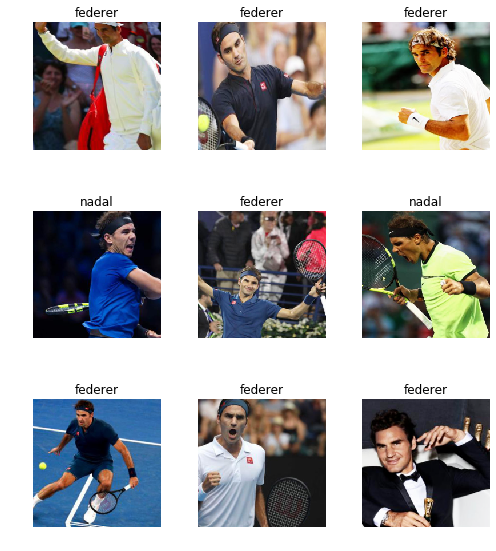

In [33]:
data.show_batch(rows=3, figsize=(7,8))

In [34]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.851074,0.633869,0.356589
2,0.658218,0.509199,0.279070
3,0.562735,0.470999,0.178295
4,0.497064,0.475976,0.186047


In [36]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

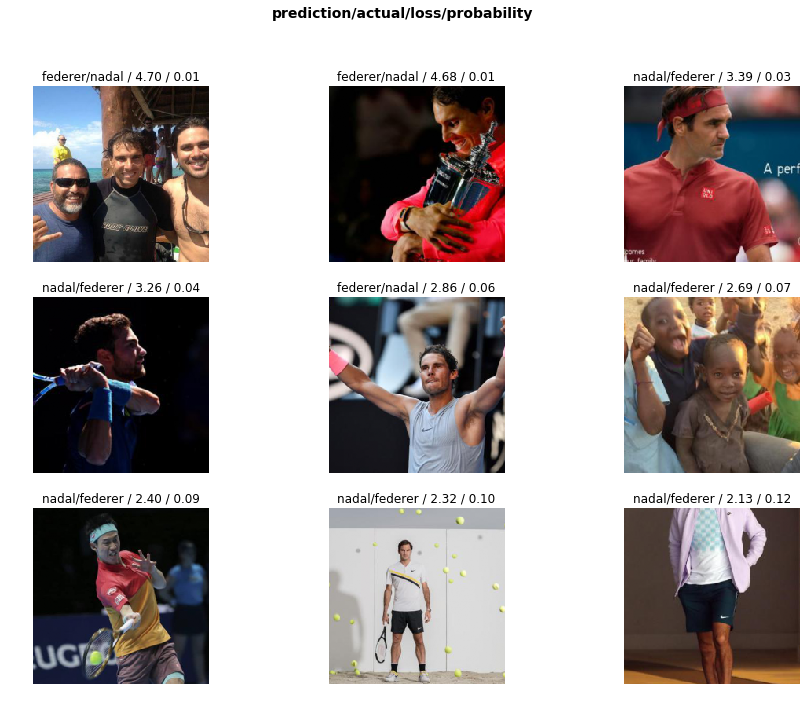

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


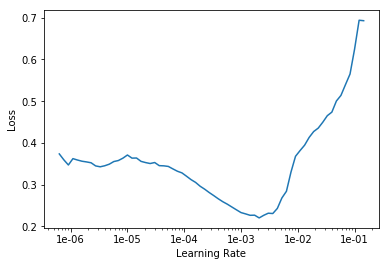

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.407884,0.271447,0.135135
2,0.328023,0.550384,0.189189


In [19]:
learn.load('stage-1');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

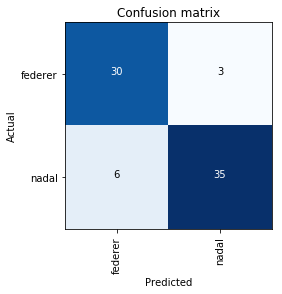

In [21]:
interp.plot_confusion_matrix()

In [22]:
from fastai.widgets import *

In [23]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [25]:
ImageCleaner(ds, idxs, path,duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [26]:
??ImageCleaner